In [2]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl
# %matplotlib inline
import pandas as pd
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import time

data = pd.read_excel('data.xlsx')

del data['FROM DATE']
del data['TO DATE']

names = data.columns

data.drop_duplicates(inplace=True)  # removing duplicates
data = data.dropna()

In [12]:
num_d = data.values


In [70]:
# feature = num_d[:,:2]
# labels = num_d[:,2].reshape(num_d.shape[0],1)

at = num_d[:,0] #AT
pm10 = num_d[:,2]#PM10
pm2_5 = num_d[:,3]#
no2 = num_d[:,11] #NO2
no = num_d[:,12]#NO
nox = num_d[:,13]#NOX
so2 = num_d[:,14]#SO2
co = num_d[:,16]#CO
a = np.array(at)[np.newaxis].T
b = np.array(no2)[np.newaxis]
c = np.array(no)[np.newaxis]
d = np.array(nox)[np.newaxis]
e = np.array(so2)[np.newaxis]
f = np.array(co)[np.newaxis]
g = np.array(pm10)[np.newaxis].T#PM10
h = np.array(pm2_5)[np.newaxis].T#PM2.5



t=a

t = np.insert(t,1,b,axis=1)
t = np.insert(t,2,e,axis=1)
t = np.insert(t,3,f,axis=1)

# t = np.insert(t,4,e,axis=1)
# t = np.insert(t,5,f,axis=1)

# t = np.zeros((6,6+1))
# t[:,:-5]=a
feature = t
label = g

# print(label)

In [71]:
d1_min , d1_max = feature[:,0].min(),feature[:,0].max()
d2_min , d2_max = feature[:,1].min(),feature[:,1].max()
d3_min , d3_max = feature[:,2].min(),feature[:,2].max()
d4_min , d4_max = feature[:,3].min(),feature[:,3].max()
# d5_min , d5_max = feature[:,4].min(),feature[:,4].max()
# d6_min , d6_max = feature[:,5].min(),feature[:,5].max()

In [72]:
dim1 = [d1_min ,d1_max]
dim2 = [d2_min ,d2_max]
dim3 = [d3_min ,d3_max]
dim4 = [d4_min ,d4_max]
# dim5 = [d5_min ,d5_max]
# dim6 = [d6_min ,d6_max]

num_output = label.shape[1]

snn = nl.net.newp([dim1,dim2,dim3,dim4],num_output)

In [73]:
error_progress = snn.train(feature,label,epochs=20,show=20,lr=0.03)


Epoch: 20; Error: 679574014.5;
The maximum number of train epochs is reached


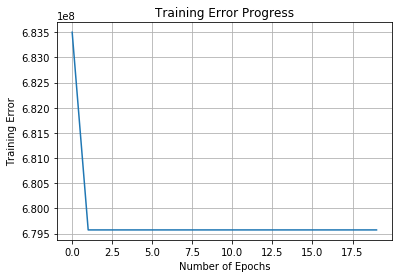

In [74]:
plt.plot(error_progress)
plt.xlabel('Number of Epochs')
plt.ylabel('Training Error')
plt.title('Training Error Progress')
plt.grid()

In [66]:
out = snn.sim(feature)

In [67]:
out

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])